## Project: Naive Bayes (By Archit Pandya)

**Problem Statement:**

Based on the dataset provided, it appears to contain three columns: "id," "text," and "label." The "text" column seems to contain textual data, possibly reviews or descriptions, and the "label" column contains categories, in this case, 'dogs.'

You are provided with a dataset containing various textual entries categorized under different labels. Your task is to develop a model using the Naive Bayes algorithm to classify the text into its appropriate category based on the content. Specifically, focus on preprocessing the text data, converting it into a suitable format for the Naive Bayes model, training the model, and then evaluating its performance on unseen data. Aim to achieve the highest possible accuracy in correctly categorizing the text entries. 

Additionally, explore different feature extraction techniques and Naive Bayes variants to understand their impact on the model's performance.

1. [`Import Libraries`](#1)
2. [`Model BOW : Building W/O Stop Words`](#2)
    <br>[2.1 Read Dataset and Create Dataframe](#2.1)
    <br>[2.2 Check the Dataframe Size and Shape and Encode the Class 'Label'](#2.2)
    <br>[2.3. Preprocess Tweet text](#2.3)
    <br>[2.4. Perform Count Features](#2.4)
    <br>[2.5 Build 'CountVectorizer' - BOW](#2.5)
    <br>[2.6 Implement Multinomial Naive Bayes](#2.6)
3. [`Model Building: Using Stop Word, Lemmatize`](#3)
    <br>[3.1 Read Dataset and Create Dataframe](#3.1)
    <br>[3.2 Check the Dataframe Size and Shape and Encode the Class 'Label'](#3.2)
    <br>[3.3. Preprocess Tweet text](#3.3)
    <br>[3.4. Perform Count Features](#3.4)
    <br>[3.5 Build 'CountVectorizer' - BOW](#3.5)
    <br>[3.6 Implement Multinomial Naive Bayes](#3.6)
4. [`Model Building: Using Stop Words, Lemmatize, TF_IDF`](#4)
    <br>[4.1 Read Dataset and Create Dataframe](#4.1)
    <br>[4.2 Check the Dataframe Size and Shape and Encode the Class 'Label'](#4.2)
    <br>[4.3. Preprocess Tweet text](#4.3)
    <br>[4.4 Perform Count Features](#4.4)
    <br>[4.5 Build 'TfidfVectorizer'](#4.5)
    <br>[4.6 Implement Multinomial Naive Bayes](#4.6)
5. [`Model Building: Using Wordembedding in Word2Vec`](#5)
    <br>[5.1 Read Dataset and Create Dataframe](#5.1)
    <br>[5.2 Check the Dataframe Size and Shape and Encode the Class 'Label'](#5.2)
    <br>[5.3. Preprocess Tweet text](#5.3)
    <br>[5.4 Perform Count Features](#5.4)
    <br>[5.5 Build 'TfidfVectorizer'](#5.5)
    <br>[5.6 Implement Multinomial Naive Bayes](#5.6)

6. [`Summary: Plot ROC and Confusion Matrix by Model`](#6)
    

## 1. Import Libraries<a id='1'></a>

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score,roc_auc_score,roc_curve, auc,confusion_matrix, ConfusionMatrixDisplay

import nltk
from nltk.corpus import stopwords                           
from nltk.stem import WordNetLemmatizer                     
from nltk.corpus import wordnet as wn
from spacy.cli import download
from spacy import load

# !pip install contractions
# import sys  
# !{sys.executable} -m pip install contractions

import contractions

import warnings

# nltk.download('omw-1.4')
# nltk.download('wordnet')
# nltk.download('wordnet2022')
# nlp = load('en_core_web_sm')

import warnings

%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", 300)

print('Imported Libraries')


Imported Libraries


In [2]:
models=[]
fpr_trains=[];tpr_trains=[];thresholds_trains=[];fpr_valids=[];tpr_valids=[];thresholds_valids=[]
f1_score_trains=[];f1_score_valids=[];roc_auc_score_trains=[];roc_auc_score_valids=[]
model_feature_rows_trains=[];model_feature_cols_trains=[];model_feature_rows_valids=[];model_feature_cols_valids=[];


## 2. Model Building: W/O Stop Words<a id='2'></a>

### 2.1 Read Dataset and Create Dataframe<a id='2.1'></a> 

In [3]:
tweets = pd.read_csv("lNlhedMcSH63Idvr6lzE_valid.csv")
tweets.head()

,id,text,label
0,0,"We started giving this to my 5 year old Labrador retriever (female) she has arthritis problems along with weakness in her back legs and it seems to help a little bit, would not hurt to try it",dogs
1,1,This product is easy to set up and use. I have a new puppy Border Collie who will be fullgrown around 50#. The crate would still have lots of room for her. I purchased this thru Amazon which is very convienience because the delivery person carried it right to my door. Total cost was cheaper than...,dogs
2,2,my dog has nerves and wants to itch and chew......the cone keeps him from a frenzy somewhat! If not for the cone he would go to town on his entire body drawing blood....however he is a contortionist and can maneuver the cone. The picture shows a black band around the diameter of the large end of...,dogs
3,3,the breeded gave us a can of Nupro when we took our scottie home...having fed it to him now for 4 months we are very pleased with the results...those who want a great coat on their animal would appreciate this supplement...would definitely recommend..,dogs
4,4,"Very study, well made poop bag. Easy to open and holds the poop with no leaking, but I only gave it four stars because it does not keep the smell inside the bag. That is the only downside, but I will keep buying them, as they are convenient and affordable.",dogs


### 2.2 Check the Dataframe Size and Shape and Encode the Class 'Label'<a id='2.2'></a> 

In [4]:
tweets.shape

(15499, 3)

In [5]:
tweets['label'].value_counts(normalize=True)

dogs    0.602168
cats    0.397832
Name: label, dtype: float64

In [6]:
tweets.isnull().sum()

id       0
text     0
label    0
dtype: int64

In [7]:
#Create a LabelEncoder object
le = LabelEncoder()

#Fit the encoder to the data
tweets['label'] = le.fit_transform(tweets['label'])

In [8]:
tweets['label'].value_counts()

1    9333
0    6166
Name: label, dtype: int64

### 2.3 Preprocess Tweet text<a id='2.3'></a> 

* Data Pre-processing is the most important step prior to the model building. Remove all these unnecessary qualities from the 'Tweet data' i.e. Hashtags, User Mentions, Non ASCII Characters, Punctuations, Numbers, HTML Tags, Extra Spaces, Misspelled words,etc.

* Contraction mapping: Expanding the shortened versions or contraction of words using contraction dictionary

In [9]:
#Function to use 'Contraction Mapping'

def func_contract_words(text):
    
    # creating an empty list
    expanded_words = []    
    for word in text.split():
        
      # using contractions.fix to expand the shortened words
      expanded_words.append(contractions.fix(word))
        
    expanded_text = ' '.join(expanded_words)
    
    return expanded_text

In [10]:
#Function to pre-process OR clean the text

def func_tweet_cleaner(cleanString):
    #contraction mapping
    cleanString=func_contract_words(cleanString)                  
    #Removing text in brackets
    cleanString=re.sub(r"(\(.*\))|(\[.*\])", "",cleanString)      
    #Removing user mentions
    cleanString=re.sub(r'@[A-Za-z0-9]+','',cleanString)           
    #Removing hashtag symbobol
    cleanString=re.sub(r"#\S+","",cleanString)                    
    #Removing hashtag symbobol, Removing links
    cleanString= re.sub(r'(http[s]?\://\S+)|([\[\(].*[\)\]])|([#@]\S+)|\n', '', cleanString)              
    #Removing 2016, 21 15
    cleanString=re.sub(r"[0-9]", "",cleanString)                  
    #Removing \n
    cleanString=re.sub(r"\n", "",cleanString)                     
    #Fetching out only letters
    letters_only = re.sub("[^a-zA-Z]", " ", cleanString)           
    #Converting everything to lowercase
    lower_case = letters_only.lower()                              
    #Split based on space to remove multiple spaces
    words = lower_case.split()                                                                     
    
    #Combining to form sentence
    return (" ".join(words)).strip()   

In [11]:
#Apply the cleaner function and add new column having clean text

tweets['cleaned_text'] = tweets['text'].apply(func_tweet_cleaner)
tweets.head()

,id,text,label,cleaned_text
0,0,"We started giving this to my 5 year old Labrador retriever (female) she has arthritis problems along with weakness in her back legs and it seems to help a little bit, would not hurt to try it",1,we started giving this to my year old labrador retriever she has arthritis problems along with weakness in her back legs and it seems to help a little bit would not hurt to try it
1,1,This product is easy to set up and use. I have a new puppy Border Collie who will be fullgrown around 50#. The crate would still have lots of room for her. I purchased this thru Amazon which is very convienience because the delivery person carried it right to my door. Total cost was cheaper than...,1,this product is easy to set up and use i have a new puppy border collie who will be fullgrown around the crate would still have lots of room for her i purchased this thru amazon which is very convienience because the delivery person carried it right to my door total cost was cheaper than the loc...
2,2,my dog has nerves and wants to itch and chew......the cone keeps him from a frenzy somewhat! If not for the cone he would go to town on his entire body drawing blood....however he is a contortionist and can maneuver the cone. The picture shows a black band around the diameter of the large end of...,1,my dog has nerves and wants to itch and chew the cone keeps him from a frenzy somewhat if not for the cone he would go to town on his entire body drawing blood however he is a contortionist and can maneuver the cone the picture shows a black band around the diameter of the large end of the cone ...
3,3,the breeded gave us a can of Nupro when we took our scottie home...having fed it to him now for 4 months we are very pleased with the results...those who want a great coat on their animal would appreciate this supplement...would definitely recommend..,1,the breeded gave us a can of nupro when we took our scottie home having fed it to him now for months we are very pleased with the results those who want a great coat on their animal would appreciate this supplement would definitely recommend
4,4,"Very study, well made poop bag. Easy to open and holds the poop with no leaking, but I only gave it four stars because it does not keep the smell inside the bag. That is the only downside, but I will keep buying them, as they are convenient and affordable.",1,very study well made poop bag easy to open and holds the poop with no leaking but i only gave it four stars because it does not keep the smell inside the bag that is the only downside but i will keep buying them as they are convenient and affordable


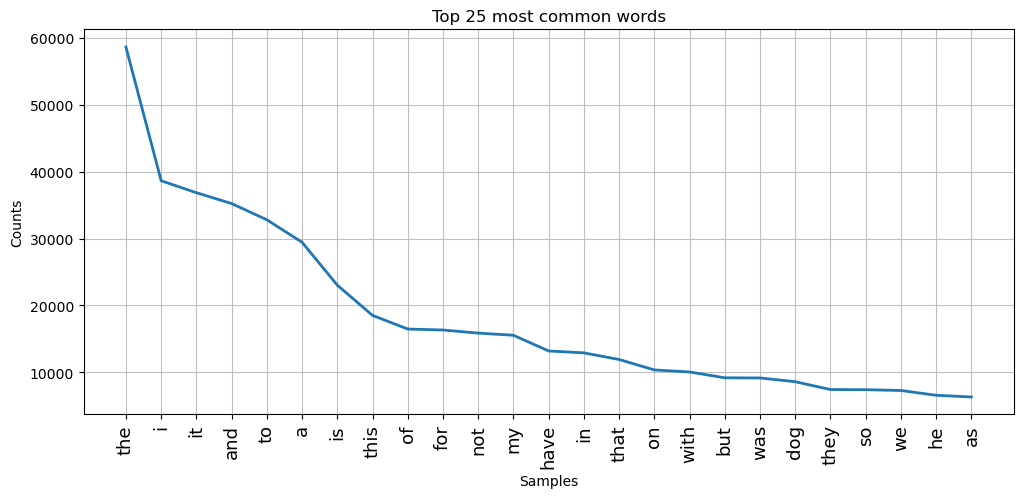

In [12]:
#Visualize the tweet text after cleaning

all_words = []
for line in list(tweets['cleaned_text']):
    words = line.split()
    for word in words:
        all_words.append(word)
        
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False);

### 2.4 Perform Count Features<a id='2.4'></a>

In [13]:
#Compute Average length of the given text

def func_avg_length(tweet):
    tweet_avg_len = []
    for row in tweet:
        row_len=[]
        for term in row.split():
            row_len.append(len(term))
        
        if len(row_len) > 0:
            row_avg_len = sum(row_len) / len(row_len)
        else:
            row_avg_len = sum(row_len)
            
        tweet_avg_len.append(row_avg_len)
    
    return tweet_avg_len

In [14]:
#Perform different Count Features and add into the Dataframe

tweets['avg_len']    = func_avg_length(tweets['cleaned_text'])
tweets['total_count']=[len(line) for line in tweets['cleaned_text']]
tweets['word_count'] =[len(line.split()) for line in tweets['cleaned_text']]
tweets['space_count']=[line.count(' ') for line in tweets['cleaned_text']]
tweets['char_count'] =tweets['total_count']-tweets['space_count']
tweets.head()

,id,text,label,cleaned_text,avg_len,total_count,word_count,space_count,char_count
0,0,"We started giving this to my 5 year old Labrador retriever (female) she has arthritis problems along with weakness in her back legs and it seems to help a little bit, would not hurt to try it",1,we started giving this to my year old labrador retriever she has arthritis problems along with weakness in her back legs and it seems to help a little bit would not hurt to try it,4.142857,179,35,34,145
1,1,This product is easy to set up and use. I have a new puppy Border Collie who will be fullgrown around 50#. The crate would still have lots of room for her. I purchased this thru Amazon which is very convienience because the delivery person carried it right to my door. Total cost was cheaper than...,1,this product is easy to set up and use i have a new puppy border collie who will be fullgrown around the crate would still have lots of room for her i purchased this thru amazon which is very convienience because the delivery person carried it right to my door total cost was cheaper than the loc...,4.206349,327,63,62,265
2,2,my dog has nerves and wants to itch and chew......the cone keeps him from a frenzy somewhat! If not for the cone he would go to town on his entire body drawing blood....however he is a contortionist and can maneuver the cone. The picture shows a black band around the diameter of the large end of...,1,my dog has nerves and wants to itch and chew the cone keeps him from a frenzy somewhat if not for the cone he would go to town on his entire body drawing blood however he is a contortionist and can maneuver the cone the picture shows a black band around the diameter of the large end of the cone ...,3.815951,784,163,162,622
3,3,the breeded gave us a can of Nupro when we took our scottie home...having fed it to him now for 4 months we are very pleased with the results...those who want a great coat on their animal would appreciate this supplement...would definitely recommend..,1,the breeded gave us a can of nupro when we took our scottie home having fed it to him now for months we are very pleased with the results those who want a great coat on their animal would appreciate this supplement would definitely recommend,4.377778,241,45,44,197
4,4,"Very study, well made poop bag. Easy to open and holds the poop with no leaking, but I only gave it four stars because it does not keep the smell inside the bag. That is the only downside, but I will keep buying them, as they are convenient and affordable.",1,very study well made poop bag easy to open and holds the poop with no leaking but i only gave it four stars because it does not keep the smell inside the bag that is the only downside but i will keep buying them as they are convenient and affordable,4.000000,249,50,49,200


### 2.5 Build 'CountVectorizer' - BOW<a id='2.5'></a>

Bag of Words (BOW) Features: Frequency of every word in vocabulary is used to build the feature space.

In [15]:
vectorizer = CountVectorizer()
features= vectorizer.fit_transform(tweets['cleaned_text'])
features.shape

(15499, 21350)

**Every word in the vocabulary is a feature**

In [16]:
vectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aaaand', ..., 'zukes', 'zymox', 'zyrtec'],
      dtype=object)

In [17]:
xtrain_bow, xvalid_bow, ytrain_bow, yvalid_bow = train_test_split(features,tweets['label'],test_size=0.3,random_state=42)

In [18]:
xtrain_bow.shape, ytrain_bow.shape, xvalid_bow.shape, yvalid_bow.shape

((10849, 21350), (10849,), (4650, 21350), (4650,))

### 2.6 Implement Multinomial Naive Bayes<a id='2.6'></a>

In [19]:
#instantiate model
naive_bayes_bow = MultinomialNB()          

#training model
naive_bayes_bow.fit(xtrain_bow, ytrain_bow)

#predicting on traiin and validation set
prediction_bow_train  = naive_bayes_bow.predict(xtrain_bow)
prediction_bow_valid  = naive_bayes_bow.predict(xvalid_bow)
preds_proba_bow_train = naive_bayes_bow.predict_proba(xtrain_bow)[:, 1]
preds_proba_bow_valid = naive_bayes_bow.predict_proba(xvalid_bow)[:, 1]

# Calculate confusion matrix
cm_bow_train = confusion_matrix(ytrain_bow, prediction_bow_train)
cm_bow_valid = confusion_matrix(yvalid_bow, prediction_bow_valid)
                                
#Calculate ROC curve and AUC
fpr_bow_train, tpr_bow_train, thresholds_bow_train = roc_curve(ytrain_bow, preds_proba_bow_train)
fpr_bow_valid, tpr_bow_valid, thresholds_bow_valid = roc_curve(yvalid_bow, preds_proba_bow_valid)

roc_auc_bow_train = auc(fpr_bow_train, tpr_bow_train)
roc_auc_bow_valid = auc(fpr_bow_valid, tpr_bow_valid)

#Calculating f1-score score
f1_score_bow_train=f1_score(ytrain_bow, prediction_bow_train) 
f1_score_bow_valid=f1_score(yvalid_bow, prediction_bow_valid)       


# #calculating roc_auc score
roc_score_bow_train=roc_auc_score(ytrain_bow, preds_proba_bow_train)
roc_score_bow_valid=roc_auc_score(yvalid_bow, preds_proba_bow_valid)
#Append to respective list
# roc_auc_score_trains.append(roc_score_bow_train);roc_auc_score_valids.append(roc_score_bow_valid);

#Append to the list
models.append('MultinomialNB-BOW')
f1_score_trains.append(f1_score_bow_train);roc_auc_score_trains.append(roc_auc_bow_train);
model_feature_rows_trains.append(xtrain_bow.shape[0]);model_feature_cols_trains.append(xtrain_bow.shape[1]);

f1_score_valids.append(f1_score_bow_valid);roc_auc_score_valids.append(roc_auc_bow_valid);
model_feature_rows_valids.append(xvalid_bow.shape[0]);model_feature_cols_valids.append(xvalid_bow.shape[1]);

print('F1-Score (Train): ',     f1_score_bow_train)
print('F1-Score (Valid): ',     f1_score_bow_valid)
print('ROW-AUC-Score (Train): ',roc_score_bow_train)
print('ROW-AUC-Score (Valid): ',roc_score_bow_valid)

F1-Score (Train):  0.9067904469566519
F1-Score (Valid):  0.8659503258763431
ROW-AUC-Score (Train):  0.945467995751013
ROW-AUC-Score (Valid):  0.9032856984708392


## 3. Model Building: Using Stop Words, Lemmatize<a id='3'></a>

### 3.1 Read Dataset and Create Dataframe<a id='3.1'></a>

In [20]:
tweets_stp = pd.read_csv("lNlhedMcSH63Idvr6lzE_valid.csv")
tweets_stp.head()

,id,text,label
0,0,"We started giving this to my 5 year old Labrador retriever (female) she has arthritis problems along with weakness in her back legs and it seems to help a little bit, would not hurt to try it",dogs
1,1,This product is easy to set up and use. I have a new puppy Border Collie who will be fullgrown around 50#. The crate would still have lots of room for her. I purchased this thru Amazon which is very convienience because the delivery person carried it right to my door. Total cost was cheaper than...,dogs
2,2,my dog has nerves and wants to itch and chew......the cone keeps him from a frenzy somewhat! If not for the cone he would go to town on his entire body drawing blood....however he is a contortionist and can maneuver the cone. The picture shows a black band around the diameter of the large end of...,dogs
3,3,the breeded gave us a can of Nupro when we took our scottie home...having fed it to him now for 4 months we are very pleased with the results...those who want a great coat on their animal would appreciate this supplement...would definitely recommend..,dogs
4,4,"Very study, well made poop bag. Easy to open and holds the poop with no leaking, but I only gave it four stars because it does not keep the smell inside the bag. That is the only downside, but I will keep buying them, as they are convenient and affordable.",dogs


### 3.2 Check the Dataframe Size and Shape and Encode the Class 'Label'<a id='3.2'></a>

In [21]:
tweets_stp = tweets_stp.drop(['id'],axis=1)

In [22]:
tweets_stp.shape

(15499, 2)

In [23]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the data
tweets_stp['label'] = le.fit_transform(tweets_stp['label'])

In [24]:
tweets_stp['label'].value_counts()

1    9333
0    6166
Name: label, dtype: int64

### 3.3. Preprocess Tweet text<a id='3.3'></a>

Stop words usually refers to the most commonly used words in a language (such as “the”, “a”, “an”, “in”) 

This step is a one of the important steps to come up with more robust input

In [25]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
tweets_stp['text'][12]

"Made in USA - seems well made, but I have been playing easy with my two cats.I highly recommend using caution when playing with your cats!!! If a child is using this toy with the cats, then supervise their usage too! Your cat could get hurt!I gave 4 Stars because of the design, which is a metal fishing hook style to connect the attachments - I hope to upload a picture. It is a great design, in terms of easily switching attachments, but the loop holes make it too easy for your cats' teeth and nails to get caught when your cat is biting or swatting at the toy. I may put tape over the loop holes for protection. The attachments themselves seem to be a little weighted and it is very easy to swing the attachments and whack the cat in the head or teeth.Both of my cats play with the attachments, but each cat prefers a different attachment. One cat loves the sparkler attachment and the other cat loves the blue fluffed feather attachment. Neither cat cares for the standard feather attachment. T

In [27]:
lemmatizer = WordNetLemmatizer() 
new_sentence=''
for i in tweets_stp['text'][12].split():
  new_sentence=new_sentence+lemmatizer.lemmatize(i.lower())+' '
new_sentence

"made in usa - seems well made, but i have been playing easy with my two cats.i highly recommend using caution when playing with your cats!!! if a child is using this toy with the cats, then supervise their usage too! your cat could get hurt!i gave 4 star because of the design, which is a metal fishing hook style to connect the attachment - i hope to upload a picture. it is a great design, in term of easily switching attachments, but the loop hole make it too easy for your cats' teeth and nail to get caught when your cat is biting or swatting at the toy. i may put tape over the loop hole for protection. the attachment themselves seem to be a little weighted and it is very easy to swing the attachment and whack the cat in the head or teeth.both of my cat play with the attachments, but each cat prefers a different attachment. one cat love the sparkler attachment and the other cat love the blue fluffed feather attachment. neither cat care for the standard feather attachment. the blue fluf

In [28]:
#Function to use 'Contraction Mapping'

def func_contract_words_stp(text):
    
    # creating an empty list
    expanded_words = []    
    for word in text.split():
      # using contractions.fix to expand the shortened words
      expanded_words.append(contractions.fix(word))
        
    expanded_text = ' '.join(expanded_words)
    
    return expanded_text

In [29]:
# function to pre-process R clean the text

def func_tweet_cleaner_lema(cleanString):
    #contraction mapping
    cleanString=func_contract_words_stp(cleanString)              
    #Removing text in brackets
    cleanString=re.sub(r"(\(.*\))|(\[.*\])", "",cleanString)      
    #Removing user mentions
    cleanString=re.sub(r'@[A-Za-z0-9]+','',cleanString)           
    #Removing hashtag symbobol
    cleanString=re.sub(r"#\S+","",cleanString)                    
    #Removing links
    cleanString= re.sub(r'(http[s]?\://\S+)|([\[\(].*[\)\]])|([#@]\S+)|\n', '', cleanString)              
    #Removing 2016, 21 15
    cleanString=re.sub(r"[0-9]", "",cleanString)                  
    #Removing \n
    cleanString=re.sub(r"\n", "",cleanString)                     
    
    #Fetching out only letters
    letters_only = re.sub("[^a-zA-Z]", " ", cleanString)           
    #Converting everything to lowercase
    lower_case = letters_only.lower()                              
    #stopwords removal
    tokens = [w for w in lower_case.split() if not w in stop_words]
    newString=''
    for i in tokens:                                                 
        #converting words to lemma
        newString=newString+lemmatizer.lemmatize(i)+' '                                           
    return newString.strip()                  

In [30]:
#Apply the clean function and create list of cleaned text

cleaned_tweets = []
for i in tweets_stp['text']:
    cleaned_tweets.append(func_tweet_cleaner_lema(i))
print(cleaned_tweets[:5])   #print top 5 records

['started giving year old labrador retriever arthritis problem along weakness back leg seems help little bit would hurt try', 'product easy set use new puppy border collie fullgrown around crate would still lot room purchased thru amazon convienience delivery person carried right door total cost cheaper local pet store yep love amazon', 'dog nerve want itch chew cone keep frenzy somewhat cone would go town entire body drawing blood however contortionist maneuver cone picture show black band around diameter large end cone case cone received purchased cone exposed plastic sharp run leg hurt little also scratch like back scratcher imagine good must feel almost hate get serve purpose without like said would frenzy nerve would chew self bloody disapointment pictured item shipped', 'breeded gave u nupro took scottie home fed month pleased result want great coat animal would appreciate supplement would definitely recommend', 'study well made poop bag easy open hold poop leaking gave four star

In [31]:
#Add the cleaned text to the Dataframe

tweets_stp['cleaned_tweets']= cleaned_tweets  #creating new column
tweets_stp.head()

,text,label,cleaned_tweets
0,"We started giving this to my 5 year old Labrador retriever (female) she has arthritis problems along with weakness in her back legs and it seems to help a little bit, would not hurt to try it",1,started giving year old labrador retriever arthritis problem along weakness back leg seems help little bit would hurt try
1,This product is easy to set up and use. I have a new puppy Border Collie who will be fullgrown around 50#. The crate would still have lots of room for her. I purchased this thru Amazon which is very convienience because the delivery person carried it right to my door. Total cost was cheaper than...,1,product easy set use new puppy border collie fullgrown around crate would still lot room purchased thru amazon convienience delivery person carried right door total cost cheaper local pet store yep love amazon
2,my dog has nerves and wants to itch and chew......the cone keeps him from a frenzy somewhat! If not for the cone he would go to town on his entire body drawing blood....however he is a contortionist and can maneuver the cone. The picture shows a black band around the diameter of the large end of...,1,dog nerve want itch chew cone keep frenzy somewhat cone would go town entire body drawing blood however contortionist maneuver cone picture show black band around diameter large end cone case cone received purchased cone exposed plastic sharp run leg hurt little also scratch like back scratcher ...
3,the breeded gave us a can of Nupro when we took our scottie home...having fed it to him now for 4 months we are very pleased with the results...those who want a great coat on their animal would appreciate this supplement...would definitely recommend..,1,breeded gave u nupro took scottie home fed month pleased result want great coat animal would appreciate supplement would definitely recommend
4,"Very study, well made poop bag. Easy to open and holds the poop with no leaking, but I only gave it four stars because it does not keep the smell inside the bag. That is the only downside, but I will keep buying them, as they are convenient and affordable.",1,study well made poop bag easy open hold poop leaking gave four star keep smell inside bag downside keep buying convenient affordable


**Data Visualization**

Let us visualize the same plot after preprocessing

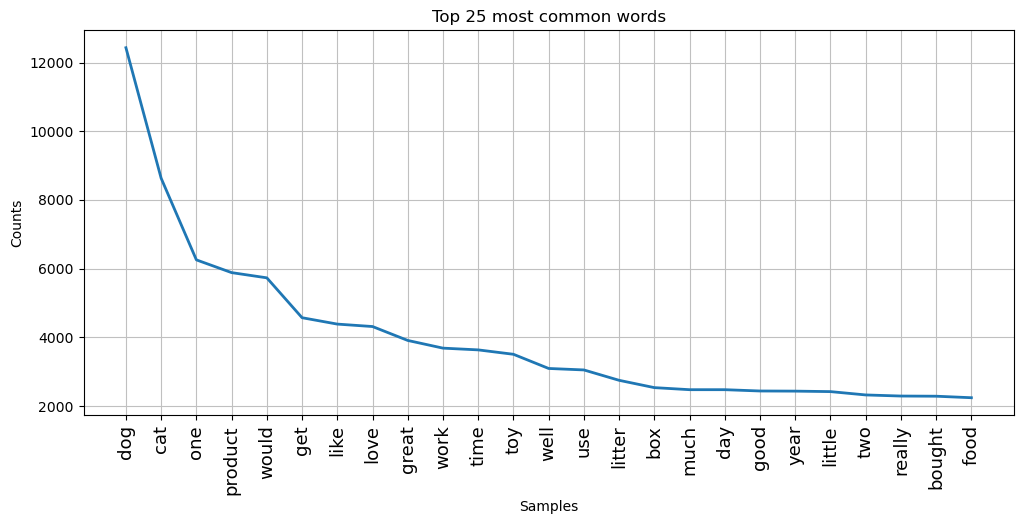

In [32]:
all_words = []
for line in list(tweets_stp['cleaned_tweets']):
    words = line.split()
    for word in words:
        all_words.append(word)
        
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False);  

### 3.4 Perform Count Features<a id='3.4'></a>

In [33]:
#Compute Average length of the given text

def func_avg_length(tweet):
    tweet_avg_len = []
    for row in tweet:
        row_len=[]
        for term in row.split():
            row_len.append(len(term))
        
        if len(row_len) > 0:
            row_avg_len = sum(row_len) / len(row_len)
        else:
            row_avg_len = sum(row_len)
            
        tweet_avg_len.append(row_avg_len)
    
    return tweet_avg_len

In [34]:
#Perform different Count Features and add into the Dataframe

tweets_stp['avg_len']    = func_avg_length(tweets_stp['cleaned_tweets'])
tweets_stp['total_count']=[len(line) for line in tweets_stp['cleaned_tweets']]
tweets_stp['word_count'] =[len(line.split()) for line in tweets_stp['cleaned_tweets']]
tweets_stp['space_count']=[line.count(' ') for line in tweets_stp['cleaned_tweets']]
tweets_stp['char_count'] =tweets_stp['total_count']-tweets_stp['space_count']
tweets_stp.head()

,text,label,cleaned_tweets,avg_len,total_count,word_count,space_count,char_count
0,"We started giving this to my 5 year old Labrador retriever (female) she has arthritis problems along with weakness in her back legs and it seems to help a little bit, would not hurt to try it",1,started giving year old labrador retriever arthritis problem along weakness back leg seems help little bit would hurt try,5.421053,121,19,18,103
1,This product is easy to set up and use. I have a new puppy Border Collie who will be fullgrown around 50#. The crate would still have lots of room for her. I purchased this thru Amazon which is very convienience because the delivery person carried it right to my door. Total cost was cheaper than...,1,product easy set use new puppy border collie fullgrown around crate would still lot room purchased thru amazon convienience delivery person carried right door total cost cheaper local pet store yep love amazon,5.363636,209,33,32,177
2,my dog has nerves and wants to itch and chew......the cone keeps him from a frenzy somewhat! If not for the cone he would go to town on his entire body drawing blood....however he is a contortionist and can maneuver the cone. The picture shows a black band around the diameter of the large end of...,1,dog nerve want itch chew cone keep frenzy somewhat cone would go town entire body drawing blood however contortionist maneuver cone picture show black band around diameter large end cone case cone received purchased cone exposed plastic sharp run leg hurt little also scratch like back scratcher ...,5.357143,444,70,69,375
3,the breeded gave us a can of Nupro when we took our scottie home...having fed it to him now for 4 months we are very pleased with the results...those who want a great coat on their animal would appreciate this supplement...would definitely recommend..,1,breeded gave u nupro took scottie home fed month pleased result want great coat animal would appreciate supplement would definitely recommend,5.761905,141,21,20,121
4,"Very study, well made poop bag. Easy to open and holds the poop with no leaking, but I only gave it four stars because it does not keep the smell inside the bag. That is the only downside, but I will keep buying them, as they are convenient and affordable.",1,study well made poop bag easy open hold poop leaking gave four star keep smell inside bag downside keep buying convenient affordable,5.045455,132,22,21,111


### 3.5 Build 'CountVectorizer' - BOW<a id='3.5'></a>

Bag of Words (BOW) Features: Frequency of every word in vocabulary is used to build the feature space.

In [35]:
vectorizer_stp = CountVectorizer()
features_stp= vectorizer_stp.fit_transform(tweets_stp['cleaned_tweets'])
features_stp.shape

(15499, 18926)

**Every word in the vocabulary is a feature**

In [36]:
vectorizer_stp.get_feature_names_out()

array(['aa', 'aaa', 'aaaand', ..., 'zukes', 'zymox', 'zyrtec'],
      dtype=object)

In [37]:
tweets_stp['label'].value_counts()

1    9333
0    6166
Name: label, dtype: int64

**Split the dataset into training and validation set**

In [38]:
xtrain_sbow, xvalid_sbow, ytrain_sbow, yvalid_sbow = train_test_split(features_stp,tweets_stp['label'],test_size=0.3,random_state=42)

In [39]:
xtrain_sbow.shape, xvalid_sbow.shape, ytrain_sbow.shape, yvalid_sbow.shape

((10849, 18926), (4650, 18926), (10849,), (4650,))

### 3.6 Implement Multinomial Naive Bayes<a id='3.6'></a>

In [40]:
#instantiate model
naive_bayes_sbow = MultinomialNB()


#training model
naive_bayes_sbow.fit(xtrain_sbow, ytrain_sbow)          

#predicting on traiin and validation set
prediction_sbow_train  = naive_bayes_sbow.predict(xtrain_sbow)
prediction_sbow_valid  = naive_bayes_sbow.predict(xvalid_sbow)
preds_proba_sbow_train = naive_bayes_sbow.predict_proba(xtrain_sbow)[:,1]
preds_proba_sbow_valid = naive_bayes_sbow.predict_proba(xvalid_sbow)[:,1]

# Calculate confusion matrix
cm_sbow_train = confusion_matrix(ytrain_sbow, prediction_sbow_train)
cm_sbow_valid = confusion_matrix(yvalid_sbow, prediction_sbow_valid)

#Calculate ROC curve and AUC
fpr_sbow_train, tpr_sbow_train, thresholds_sbow_train = roc_curve(ytrain_sbow, preds_proba_sbow_train)
fpr_sbow_valid, tpr_sbow_valid, thresholds_sbow_valid = roc_curve(yvalid_sbow, preds_proba_sbow_valid)

roc_auc_sbow_train = auc(fpr_sbow_train, tpr_sbow_train)
roc_auc_sbow_valid = auc(fpr_sbow_valid, tpr_sbow_valid)

# #calculating f1-score score
f1_score_sbow_train=f1_score(ytrain_sbow, prediction_sbow_train) 
f1_score_sbow_valid=f1_score(yvalid_sbow, prediction_sbow_valid)        

# #calculating roc_auc score
roc_score_sbow_train=roc_auc_score(ytrain_sbow, preds_proba_sbow_train)
roc_score_sbow_valid=roc_auc_score(yvalid_sbow, preds_proba_sbow_valid)

#Append to the list
models.append('MultinomialNB-SBOW')
f1_score_trains.append(f1_score_sbow_train);roc_auc_score_trains.append(roc_auc_sbow_train);
model_feature_rows_trains.append(xtrain_sbow.shape[0]);model_feature_cols_trains.append(xtrain_sbow.shape[1]);

f1_score_valids.append(f1_score_sbow_valid);roc_auc_score_valids.append(roc_auc_sbow_valid);
model_feature_rows_valids.append(xvalid_sbow.shape[0]);model_feature_cols_valids.append(xvalid_sbow.shape[1]);

print('F1-Score (Train): ',     f1_score_sbow_train)
print('F1-Score (Valid): ',     f1_score_sbow_valid)
print('ROW-AUC-Score (Train): ',roc_score_sbow_train)
print('ROW-AUC-Score (Valid): ',roc_score_sbow_valid)

F1-Score (Train):  0.9036460282997679
F1-Score (Valid):  0.8643410852713178
ROW-AUC-Score (Train):  0.9439190989522829
ROW-AUC-Score (Valid):  0.9044773561929331


## 4. Model Building: Using Stop Words, Lemmatize, TF_IDF<a id='4'></a>

### 4.1 Read Dataset and Create Dataframe<a id='4.1'></a>

In [41]:
tweets_tfidf = pd.read_csv("lNlhedMcSH63Idvr6lzE_valid.csv")
tweets_tfidf.head()

,id,text,label
0,0,"We started giving this to my 5 year old Labrador retriever (female) she has arthritis problems along with weakness in her back legs and it seems to help a little bit, would not hurt to try it",dogs
1,1,This product is easy to set up and use. I have a new puppy Border Collie who will be fullgrown around 50#. The crate would still have lots of room for her. I purchased this thru Amazon which is very convienience because the delivery person carried it right to my door. Total cost was cheaper than...,dogs
2,2,my dog has nerves and wants to itch and chew......the cone keeps him from a frenzy somewhat! If not for the cone he would go to town on his entire body drawing blood....however he is a contortionist and can maneuver the cone. The picture shows a black band around the diameter of the large end of...,dogs
3,3,the breeded gave us a can of Nupro when we took our scottie home...having fed it to him now for 4 months we are very pleased with the results...those who want a great coat on their animal would appreciate this supplement...would definitely recommend..,dogs
4,4,"Very study, well made poop bag. Easy to open and holds the poop with no leaking, but I only gave it four stars because it does not keep the smell inside the bag. That is the only downside, but I will keep buying them, as they are convenient and affordable.",dogs


### 4.2 Check the Dataframe Size and Shape and Encode the Class 'Label'<a id='4.2'></a>

In [42]:
tweets_tfidf = tweets_tfidf.drop(['id'],axis=1)

In [43]:
tweets_tfidf.shape

(15499, 2)

In [44]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the data
tweets_tfidf['label'] = le.fit_transform(tweets_tfidf['label'])

In [45]:
tweets_tfidf['label'].value_counts()

1    9333
0    6166
Name: label, dtype: int64

### 4.3. Preprocess Tweet text<a id='4.3'></a>

Stop words usually refers to the most commonly used words in a language (such as “the”, “a”, “an”, “in”) 

This step is a one of the important steps to come up with more robust input

In [46]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
lemmatizer = WordNetLemmatizer() 
new_sentence=''
for i in tweets_tfidf['text'][12].split():
  new_sentence=new_sentence+lemmatizer.lemmatize(i.lower())+' '
new_sentence

"made in usa - seems well made, but i have been playing easy with my two cats.i highly recommend using caution when playing with your cats!!! if a child is using this toy with the cats, then supervise their usage too! your cat could get hurt!i gave 4 star because of the design, which is a metal fishing hook style to connect the attachment - i hope to upload a picture. it is a great design, in term of easily switching attachments, but the loop hole make it too easy for your cats' teeth and nail to get caught when your cat is biting or swatting at the toy. i may put tape over the loop hole for protection. the attachment themselves seem to be a little weighted and it is very easy to swing the attachment and whack the cat in the head or teeth.both of my cat play with the attachments, but each cat prefers a different attachment. one cat love the sparkler attachment and the other cat love the blue fluffed feather attachment. neither cat care for the standard feather attachment. the blue fluf

In [48]:
def func_contract_words_stp(text):
    
    # creating an empty list
    expanded_words = []    
    for word in text.split():
      # using contractions.fix to expand the shortened words
      expanded_words.append(contractions.fix(word))
        
    expanded_text = ' '.join(expanded_words)
    
    return expanded_text

In [49]:

def func_tweet_cleaner_lema(cleanString):
    #contraction mapping
    cleanString=func_contract_words_stp(cleanString)              
    #Removing text in brackets
    cleanString=re.sub(r"(\(.*\))|(\[.*\])", "",cleanString)      
    #Removing user mentions
    cleanString=re.sub(r'@[A-Za-z0-9]+','',cleanString)           
    #Removing hashtag symbobol
    cleanString=re.sub(r"#\S+","",cleanString)                    
    #Removing links
    cleanString= re.sub(r'(http[s]?\://\S+)|([\[\(].*[\)\]])|([#@]\S+)|\n', '', cleanString)              
    #Removing 2016, 21 15
    cleanString=re.sub(r"[0-9]", "",cleanString)                  
    #Removing \n
    cleanString=re.sub(r"\n", "",cleanString)                     
    
    #Fetching out only letters
    letters_only = re.sub("[^a-zA-Z]", " ", cleanString)           
    #Converting everything to lowercase
    lower_case = letters_only.lower()                              
    #stopwords removal
    tokens = [w for w in lower_case.split() if not w in stop_words]
    newString=''
    for i in tokens:                                                 
        #converting words to lemma
        newString=newString+lemmatizer.lemmatize(i)+' '                                           
    return newString.strip()  

In [50]:
cleaned_tweets = []
for i in tweets_tfidf['text']:
    cleaned_tweets.append(func_tweet_cleaner_lema(i))
print(cleaned_tweets[:5])   #print top 5 records

['started giving year old labrador retriever arthritis problem along weakness back leg seems help little bit would hurt try', 'product easy set use new puppy border collie fullgrown around crate would still lot room purchased thru amazon convienience delivery person carried right door total cost cheaper local pet store yep love amazon', 'dog nerve want itch chew cone keep frenzy somewhat cone would go town entire body drawing blood however contortionist maneuver cone picture show black band around diameter large end cone case cone received purchased cone exposed plastic sharp run leg hurt little also scratch like back scratcher imagine good must feel almost hate get serve purpose without like said would frenzy nerve would chew self bloody disapointment pictured item shipped', 'breeded gave u nupro took scottie home fed month pleased result want great coat animal would appreciate supplement would definitely recommend', 'study well made poop bag easy open hold poop leaking gave four star

In [51]:
tweets_tfidf['cleaned_tweets']= cleaned_tweets  #creating new column
tweets_tfidf.head()

,text,label,cleaned_tweets
0,"We started giving this to my 5 year old Labrador retriever (female) she has arthritis problems along with weakness in her back legs and it seems to help a little bit, would not hurt to try it",1,started giving year old labrador retriever arthritis problem along weakness back leg seems help little bit would hurt try
1,This product is easy to set up and use. I have a new puppy Border Collie who will be fullgrown around 50#. The crate would still have lots of room for her. I purchased this thru Amazon which is very convienience because the delivery person carried it right to my door. Total cost was cheaper than...,1,product easy set use new puppy border collie fullgrown around crate would still lot room purchased thru amazon convienience delivery person carried right door total cost cheaper local pet store yep love amazon
2,my dog has nerves and wants to itch and chew......the cone keeps him from a frenzy somewhat! If not for the cone he would go to town on his entire body drawing blood....however he is a contortionist and can maneuver the cone. The picture shows a black band around the diameter of the large end of...,1,dog nerve want itch chew cone keep frenzy somewhat cone would go town entire body drawing blood however contortionist maneuver cone picture show black band around diameter large end cone case cone received purchased cone exposed plastic sharp run leg hurt little also scratch like back scratcher ...
3,the breeded gave us a can of Nupro when we took our scottie home...having fed it to him now for 4 months we are very pleased with the results...those who want a great coat on their animal would appreciate this supplement...would definitely recommend..,1,breeded gave u nupro took scottie home fed month pleased result want great coat animal would appreciate supplement would definitely recommend
4,"Very study, well made poop bag. Easy to open and holds the poop with no leaking, but I only gave it four stars because it does not keep the smell inside the bag. That is the only downside, but I will keep buying them, as they are convenient and affordable.",1,study well made poop bag easy open hold poop leaking gave four star keep smell inside bag downside keep buying convenient affordable


**Data Visualization**

Let us visualize the same plot after preprocessing

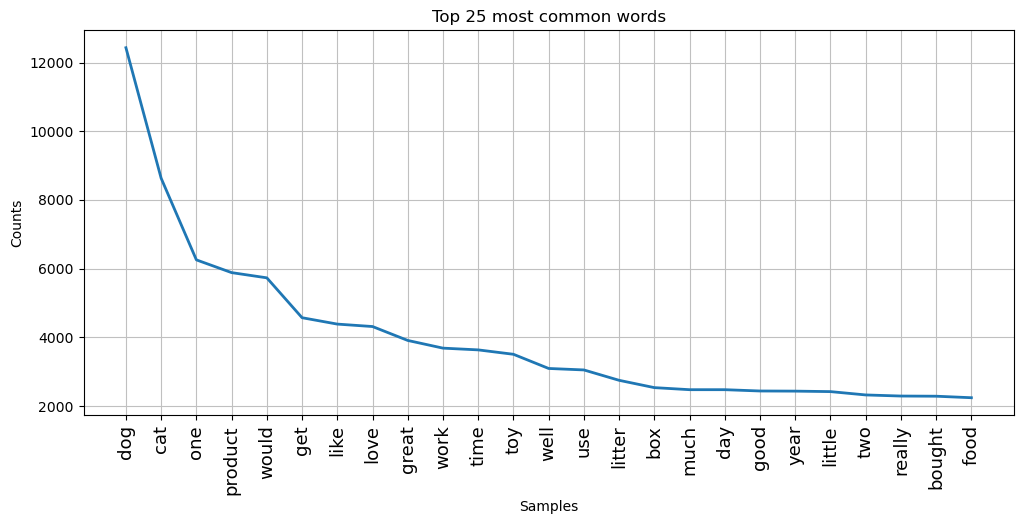

In [52]:
all_words = []
for line in list(tweets_tfidf['cleaned_tweets']):
    words = line.split()
    for word in words:
        all_words.append(word)
        
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False);  

### 4.4 Perform Count Features<a id='4.4'></a>

In [53]:
def func_avg_length(tweet):
    tweet_avg_len = []
    for row in tweet:
        row_len=[]
        for term in row.split():
            row_len.append(len(term))
        
        if len(row_len) > 0:
            row_avg_len = sum(row_len) / len(row_len)
        else:
            row_avg_len = sum(row_len)
            
        tweet_avg_len.append(row_avg_len)
    
    return tweet_avg_len

In [54]:
tweets_tfidf['avg_len']    = func_avg_length(tweets_tfidf['cleaned_tweets'])
tweets_tfidf['total_count']=[len(line) for line in tweets_tfidf['cleaned_tweets']]
tweets_tfidf['word_count'] =[len(line.split()) for line in tweets_tfidf['cleaned_tweets']]
tweets_tfidf['space_count']=[line.count(' ') for line in tweets_tfidf['cleaned_tweets']]
tweets_tfidf['char_count'] =tweets_tfidf['total_count']-tweets_tfidf['space_count']
tweets_tfidf.head()

,text,label,cleaned_tweets,avg_len,total_count,word_count,space_count,char_count
0,"We started giving this to my 5 year old Labrador retriever (female) she has arthritis problems along with weakness in her back legs and it seems to help a little bit, would not hurt to try it",1,started giving year old labrador retriever arthritis problem along weakness back leg seems help little bit would hurt try,5.421053,121,19,18,103
1,This product is easy to set up and use. I have a new puppy Border Collie who will be fullgrown around 50#. The crate would still have lots of room for her. I purchased this thru Amazon which is very convienience because the delivery person carried it right to my door. Total cost was cheaper than...,1,product easy set use new puppy border collie fullgrown around crate would still lot room purchased thru amazon convienience delivery person carried right door total cost cheaper local pet store yep love amazon,5.363636,209,33,32,177
2,my dog has nerves and wants to itch and chew......the cone keeps him from a frenzy somewhat! If not for the cone he would go to town on his entire body drawing blood....however he is a contortionist and can maneuver the cone. The picture shows a black band around the diameter of the large end of...,1,dog nerve want itch chew cone keep frenzy somewhat cone would go town entire body drawing blood however contortionist maneuver cone picture show black band around diameter large end cone case cone received purchased cone exposed plastic sharp run leg hurt little also scratch like back scratcher ...,5.357143,444,70,69,375
3,the breeded gave us a can of Nupro when we took our scottie home...having fed it to him now for 4 months we are very pleased with the results...those who want a great coat on their animal would appreciate this supplement...would definitely recommend..,1,breeded gave u nupro took scottie home fed month pleased result want great coat animal would appreciate supplement would definitely recommend,5.761905,141,21,20,121
4,"Very study, well made poop bag. Easy to open and holds the poop with no leaking, but I only gave it four stars because it does not keep the smell inside the bag. That is the only downside, but I will keep buying them, as they are convenient and affordable.",1,study well made poop bag easy open hold poop leaking gave four star keep smell inside bag downside keep buying convenient affordable,5.045455,132,22,21,111


### 4.5 Build 'TfidfVectorizer'<a id='4.5'></a>

TF-IDF features

The main idea behinf tf-idf is to increase the importance of the words that occur in the subset of documents rather than the words occuring in all the documents

TF-IDF score of every word in vocabulary is calculated and used to build the feature space

In [55]:
vectorizer_tfidf = TfidfVectorizer() 
features_tfidf = vectorizer_tfidf.fit_transform(tweets_tfidf['cleaned_tweets'])
features_tfidf.shape

(15499, 18926)

Every word in the vocabulary is a feature

In [56]:
vectorizer_tfidf.get_feature_names_out()

array(['aa', 'aaa', 'aaaand', ..., 'zukes', 'zymox', 'zyrtec'],
      dtype=object)

In [57]:
tweets_tfidf['label'].value_counts()

1    9333
0    6166
Name: label, dtype: int64

**Split the dataset into training and validation set**

In [58]:
xtrain_tfidf, xvalid_tfidf, ytrain_tfidf, yvalid_tfidf = train_test_split(features_tfidf,tweets_tfidf['label'],test_size=0.3,random_state=42)

In [59]:
xtrain_tfidf.shape, ytrain_tfidf.shape, xvalid_tfidf.shape, yvalid_tfidf.shape

((10849, 18926), (10849,), (4650, 18926), (4650,))

### 4.6 Implement Multinomial Naive Bayes<a id='4.6'></a>

In [60]:
#instantiate model
naive_bayes_tfidf = MultinomialNB()

#training model
naive_bayes_tfidf.fit(xtrain_tfidf, ytrain_tfidf)          

#predicting on traiin and validation set
prediction_tfidf_train  = naive_bayes_tfidf.predict(xtrain_tfidf)
prediction_tfidf_valid  = naive_bayes_tfidf.predict(xvalid_tfidf)
preds_proba_tfidf_train = naive_bayes_tfidf.predict_proba(xtrain_tfidf)[:,1]
preds_proba_tfidf_valid = naive_bayes_tfidf.predict_proba(xvalid_tfidf)[:,1]

# Calculate confusion matrix
cm_tfidf_train = confusion_matrix(ytrain_tfidf, prediction_tfidf_train)
cm_tfidf_valid = confusion_matrix(yvalid_tfidf, prediction_tfidf_valid)

#Calculate ROC curve and AUC
fpr_tfidf_train, tpr_tfidf_train, thresholds_tfidf_train = roc_curve(ytrain_tfidf, preds_proba_tfidf_train)
fpr_tfidf_valid, tpr_tfidf_valid, thresholds_tfidf_valid = roc_curve(yvalid_tfidf, preds_proba_tfidf_valid)

roc_auc_tfidf_train = auc(fpr_tfidf_train, tpr_tfidf_train)
roc_auc_tfidf_valid = auc(fpr_tfidf_valid, tpr_tfidf_valid)

# #calculating f1-score score
f1_score_tfidf_train=f1_score(ytrain_tfidf, prediction_tfidf_train) 
f1_score_tfidf_valid=f1_score(yvalid_tfidf, prediction_tfidf_valid)        

# #calculating roc_auc score
roc_score_tfidf_train=roc_auc_score(ytrain_tfidf, preds_proba_tfidf_train)
roc_score_tfidf_valid=roc_auc_score(yvalid_tfidf, preds_proba_tfidf_valid)

#Append to the list
models.append('MultinomialNB-TFIDF')
f1_score_trains.append(f1_score_tfidf_train);roc_auc_score_trains.append(roc_auc_tfidf_train);
model_feature_rows_trains.append(xtrain_tfidf.shape[0]);model_feature_cols_trains.append(xtrain_tfidf.shape[1]);

f1_score_valids.append(f1_score_tfidf_valid);roc_auc_score_valids.append(roc_auc_tfidf_valid);
model_feature_rows_valids.append(xvalid_tfidf.shape[0]);model_feature_cols_valids.append(xvalid_tfidf.shape[1]);

print('F1-Score (Train): ',     f1_score_tfidf_train)
print('F1-Score (Valid): ',     f1_score_tfidf_valid)
print('ROW-AUC-Score (Train): ',roc_score_tfidf_train)
print('ROW-AUC-Score (Valid): ',roc_score_tfidf_valid)

F1-Score (Train):  0.8805591722058521
F1-Score (Valid):  0.8472331704240895
ROW-AUC-Score (Train):  0.947635346981431
ROW-AUC-Score (Valid):  0.8988218193019863


## 5. Model Building: Using Wordembedding in Word2Vec<a id='5'></a>

### 5.1 Read Dataset and Create Dataframe<a id='5.1'></a>

In [61]:
tweets_w2vec = pd.read_csv("lNlhedMcSH63Idvr6lzE_valid.csv")
tweets_w2vec.head()

,id,text,label
0,0,"We started giving this to my 5 year old Labrador retriever (female) she has arthritis problems along with weakness in her back legs and it seems to help a little bit, would not hurt to try it",dogs
1,1,This product is easy to set up and use. I have a new puppy Border Collie who will be fullgrown around 50#. The crate would still have lots of room for her. I purchased this thru Amazon which is very convienience because the delivery person carried it right to my door. Total cost was cheaper than...,dogs
2,2,my dog has nerves and wants to itch and chew......the cone keeps him from a frenzy somewhat! If not for the cone he would go to town on his entire body drawing blood....however he is a contortionist and can maneuver the cone. The picture shows a black band around the diameter of the large end of...,dogs
3,3,the breeded gave us a can of Nupro when we took our scottie home...having fed it to him now for 4 months we are very pleased with the results...those who want a great coat on their animal would appreciate this supplement...would definitely recommend..,dogs
4,4,"Very study, well made poop bag. Easy to open and holds the poop with no leaking, but I only gave it four stars because it does not keep the smell inside the bag. That is the only downside, but I will keep buying them, as they are convenient and affordable.",dogs


### 5.2 Check the Dataframe Size and Shape and Encode the Class 'Label'<a id='5.2'></a>

In [62]:
tweets_w2vec = tweets_w2vec.drop(['id'],axis=1)

In [63]:
tweets_w2vec.shape

(15499, 2)

In [64]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the data
tweets_w2vec['label'] = le.fit_transform(tweets_w2vec['label'])

In [65]:
tweets_w2vec['label'].value_counts()

1    9333
0    6166
Name: label, dtype: int64

### 5.3. Preprocess Tweet text<a id='5.3'></a>

Stop words usually refers to the most commonly used words in a language (such as “the”, “a”, “an”, “in”) 

This step is a one of the important steps to come up with more robust input

In [66]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
lemmatizer = WordNetLemmatizer() 
new_sentence=''
for i in tweets_w2vec['text'][12].split():
  new_sentence=new_sentence+lemmatizer.lemmatize(i.lower())+' '
new_sentence

"made in usa - seems well made, but i have been playing easy with my two cats.i highly recommend using caution when playing with your cats!!! if a child is using this toy with the cats, then supervise their usage too! your cat could get hurt!i gave 4 star because of the design, which is a metal fishing hook style to connect the attachment - i hope to upload a picture. it is a great design, in term of easily switching attachments, but the loop hole make it too easy for your cats' teeth and nail to get caught when your cat is biting or swatting at the toy. i may put tape over the loop hole for protection. the attachment themselves seem to be a little weighted and it is very easy to swing the attachment and whack the cat in the head or teeth.both of my cat play with the attachments, but each cat prefers a different attachment. one cat love the sparkler attachment and the other cat love the blue fluffed feather attachment. neither cat care for the standard feather attachment. the blue fluf

In [68]:
def func_contract_words_stp(text):
    
    # creating an empty list
    expanded_words = []    
    for word in text.split():
      # using contractions.fix to expand the shortened words
      expanded_words.append(contractions.fix(word))
        
    expanded_text = ' '.join(expanded_words)
    
    return expanded_text

In [69]:

def func_tweet_cleaner_lema(cleanString):
    #contraction mapping
    cleanString=func_contract_words_stp(cleanString)              
    #Removing text in brackets
    cleanString=re.sub(r"(\(.*\))|(\[.*\])", "",cleanString)      
    #Removing user mentions
    cleanString=re.sub(r'@[A-Za-z0-9]+','',cleanString)           
    #Removing hashtag symbobol
    cleanString=re.sub(r"#\S+","",cleanString)                    
    #Removing links
    cleanString= re.sub(r'(http[s]?\://\S+)|([\[\(].*[\)\]])|([#@]\S+)|\n', '', cleanString)              
    #Removing 2016, 21 15
    cleanString=re.sub(r"[0-9]", "",cleanString)                  
    #Removing \n
    cleanString=re.sub(r"\n", "",cleanString)                     
    
    #Fetching out only letters
    letters_only = re.sub("[^a-zA-Z]", " ", cleanString)           
    #Converting everything to lowercase
    lower_case = letters_only.lower()                              
    #stopwords removal
    tokens = [w for w in lower_case.split() if not w in stop_words]
    newString=''
    for i in tokens:                                                 
        #converting words to lemma
        newString=newString+lemmatizer.lemmatize(i)+' '                                           
    return newString.strip() 

In [70]:
cleaned_tweets = []
for i in tweets_w2vec['text']:
    cleaned_tweets.append(func_tweet_cleaner_lema(i))
print(cleaned_tweets[:5])   #print top 5 records

['started giving year old labrador retriever arthritis problem along weakness back leg seems help little bit would hurt try', 'product easy set use new puppy border collie fullgrown around crate would still lot room purchased thru amazon convienience delivery person carried right door total cost cheaper local pet store yep love amazon', 'dog nerve want itch chew cone keep frenzy somewhat cone would go town entire body drawing blood however contortionist maneuver cone picture show black band around diameter large end cone case cone received purchased cone exposed plastic sharp run leg hurt little also scratch like back scratcher imagine good must feel almost hate get serve purpose without like said would frenzy nerve would chew self bloody disapointment pictured item shipped', 'breeded gave u nupro took scottie home fed month pleased result want great coat animal would appreciate supplement would definitely recommend', 'study well made poop bag easy open hold poop leaking gave four star

In [71]:
tweets_w2vec['cleaned_tweets']= cleaned_tweets  #creating new column
tweets_w2vec.head()

,text,label,cleaned_tweets
0,"We started giving this to my 5 year old Labrador retriever (female) she has arthritis problems along with weakness in her back legs and it seems to help a little bit, would not hurt to try it",1,started giving year old labrador retriever arthritis problem along weakness back leg seems help little bit would hurt try
1,This product is easy to set up and use. I have a new puppy Border Collie who will be fullgrown around 50#. The crate would still have lots of room for her. I purchased this thru Amazon which is very convienience because the delivery person carried it right to my door. Total cost was cheaper than...,1,product easy set use new puppy border collie fullgrown around crate would still lot room purchased thru amazon convienience delivery person carried right door total cost cheaper local pet store yep love amazon
2,my dog has nerves and wants to itch and chew......the cone keeps him from a frenzy somewhat! If not for the cone he would go to town on his entire body drawing blood....however he is a contortionist and can maneuver the cone. The picture shows a black band around the diameter of the large end of...,1,dog nerve want itch chew cone keep frenzy somewhat cone would go town entire body drawing blood however contortionist maneuver cone picture show black band around diameter large end cone case cone received purchased cone exposed plastic sharp run leg hurt little also scratch like back scratcher ...
3,the breeded gave us a can of Nupro when we took our scottie home...having fed it to him now for 4 months we are very pleased with the results...those who want a great coat on their animal would appreciate this supplement...would definitely recommend..,1,breeded gave u nupro took scottie home fed month pleased result want great coat animal would appreciate supplement would definitely recommend
4,"Very study, well made poop bag. Easy to open and holds the poop with no leaking, but I only gave it four stars because it does not keep the smell inside the bag. That is the only downside, but I will keep buying them, as they are convenient and affordable.",1,study well made poop bag easy open hold poop leaking gave four star keep smell inside bag downside keep buying convenient affordable


**Data Visualization**

Let us visualize the same plot after preprocessing

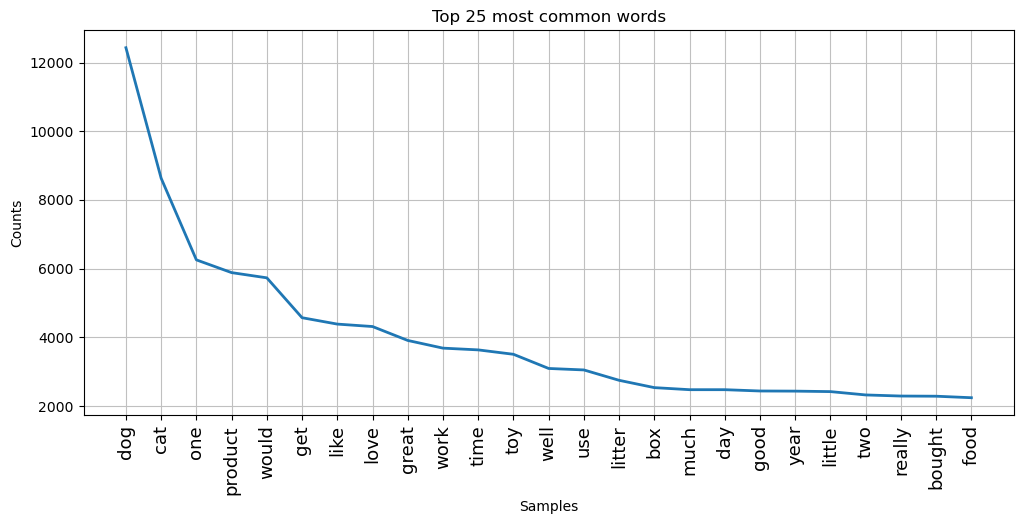

In [72]:
all_words = []
for line in list(tweets_w2vec['cleaned_tweets']):
    words = line.split()
    for word in words:
        all_words.append(word)
        
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False);  

### 5.4 Perform Count Features<a id='5.4'></a>

In [73]:
def func_avg_length(tweet):
    tweet_avg_len = []
    for row in tweet:
        row_len=[]
        for term in row.split():
            row_len.append(len(term))
        
        if len(row_len) > 0:
            row_avg_len = sum(row_len) / len(row_len)
        else:
            row_avg_len = sum(row_len)
            
        tweet_avg_len.append(row_avg_len)
    
    return tweet_avg_len

In [74]:
tweets_w2vec['avg_len']    = func_avg_length(tweets_w2vec['cleaned_tweets'])
tweets_w2vec['total_count']=[len(line) for line in tweets_w2vec['cleaned_tweets']]
tweets_w2vec['word_count'] =[len(line.split()) for line in tweets_w2vec['cleaned_tweets']]
tweets_w2vec['space_count']=[line.count(' ') for line in tweets_w2vec['cleaned_tweets']]
tweets_w2vec['char_count'] =tweets_tfidf['total_count']-tweets_w2vec['space_count']
tweets_w2vec.head()

,text,label,cleaned_tweets,avg_len,total_count,word_count,space_count,char_count
0,"We started giving this to my 5 year old Labrador retriever (female) she has arthritis problems along with weakness in her back legs and it seems to help a little bit, would not hurt to try it",1,started giving year old labrador retriever arthritis problem along weakness back leg seems help little bit would hurt try,5.421053,121,19,18,103
1,This product is easy to set up and use. I have a new puppy Border Collie who will be fullgrown around 50#. The crate would still have lots of room for her. I purchased this thru Amazon which is very convienience because the delivery person carried it right to my door. Total cost was cheaper than...,1,product easy set use new puppy border collie fullgrown around crate would still lot room purchased thru amazon convienience delivery person carried right door total cost cheaper local pet store yep love amazon,5.363636,209,33,32,177
2,my dog has nerves and wants to itch and chew......the cone keeps him from a frenzy somewhat! If not for the cone he would go to town on his entire body drawing blood....however he is a contortionist and can maneuver the cone. The picture shows a black band around the diameter of the large end of...,1,dog nerve want itch chew cone keep frenzy somewhat cone would go town entire body drawing blood however contortionist maneuver cone picture show black band around diameter large end cone case cone received purchased cone exposed plastic sharp run leg hurt little also scratch like back scratcher ...,5.357143,444,70,69,375
3,the breeded gave us a can of Nupro when we took our scottie home...having fed it to him now for 4 months we are very pleased with the results...those who want a great coat on their animal would appreciate this supplement...would definitely recommend..,1,breeded gave u nupro took scottie home fed month pleased result want great coat animal would appreciate supplement would definitely recommend,5.761905,141,21,20,121
4,"Very study, well made poop bag. Easy to open and holds the poop with no leaking, but I only gave it four stars because it does not keep the smell inside the bag. That is the only downside, but I will keep buying them, as they are convenient and affordable.",1,study well made poop bag easy open hold poop leaking gave four star keep smell inside bag downside keep buying convenient affordable,5.045455,132,22,21,111


### 5.5 Build  Using Google's pre-trained Word2Vec'<a id='5.5'></a>

In [75]:
# download and extract word2vec embeddings 
# ! wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
# ! gunzip GoogleNews-vectors-negative300.bin.gz

In [76]:
from gensim.models import KeyedVectors

# path of the downloaded model
filename = 'GoogleNews-vectors-negative300.bin'

# load into gensim
w2vec = KeyedVectors.load_word2vec_format(filename, binary=True)

Once you have executed the above code, your word2vec model is finally installed and loaded. Let's explore some of the features of this model.

__Contextual Relationship Between Words__

 - One of the impressive things about word2vec is it's ability to capture semantic relationship between words. That is the reason that you can do cool stuff like perform linear algebra on words and get an appropriate output. Have a look at the following example:

    `airplane - fly + drive = car`

 - If you pass the left hand side of the above equation to the model, it will give the right handside. Which makes sense because what would you get if you remove the ability to fly from an airplane? And add the ability to drive? You would get a car!

### Text Classification using Word2Vec

Let's now get back to our task to classify our twitter data by using __word2vec__ as features. However, word2vec gives vector representation of individual words, in order to find the same for a statement or a document you can take mean of the vectors of it's constituent words.

<br>

Please note that the length of every vector of the pre-trained word2vec embeddings is 300.

In [77]:
# function to get vector representation of a tweet
def word_vector(tokens):
    vec = np.zeros((1,300))
    count = 0.
    for word in tokens:
        try:
            vec += w2vec.word_vec(word)
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [78]:
# empty array of shape (no. of tweets X 300) to store word2vec features
wordvec_arrays = np.zeros((len(tweets_w2vec), 300))

for i,j in enumerate(tweets_w2vec['cleaned_tweets']):
    wordvec_arrays[i,:] = word_vector(j.split())

In [79]:
wordvec_arrays.shape

(15499, 300)

In [80]:
#Find Minimum Value for Input X

wordvec_arrays.min()

-0.71484375

### Note: Having -ve value in Input 'X'

Using MultinomialNB failed when using above features because of having negative values

**`"ValueError: Negative values in data passed to MultinomialNB (input X)"`**
 
Suggested solutions:
* Skip MultinomialNB when some of the features have negative values.
* Use GaussianNB instead.
* Normalize features to [0, 1] range.

**Split the dataset into training and validation set**

In [81]:
xtrain_w2vec, xvalid_w2vec, ytrain_w2vec, yvalid_w2vec = train_test_split(wordvec_arrays,tweets_w2vec['label'],test_size=0.3,random_state=42)

In [82]:
xtrain_w2vec.shape, ytrain_w2vec.shape, xvalid_w2vec.shape, yvalid_w2vec.shape

((10849, 300), (10849,), (4650, 300), (4650,))

**Apply MinMaxScaler to Input X to get rid off Negative values in Input 'X'**

In [83]:
xtrain_w2vec.min(), xvalid_w2vec.min()

(-0.71484375, -0.55078125)

In [84]:
# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the X Input
X_train_w2vec_scaled = scaler.fit_transform(xtrain_w2vec)
X_valid_w2vec_scaled = scaler.fit_transform(xvalid_w2vec)

In [85]:
X_train_w2vec_scaled.min(), X_valid_w2vec_scaled.min(),X_train_w2vec_scaled.shape, X_valid_w2vec_scaled.shape

(0.0, 0.0, (10849, 300), (4650, 300))

### 5.6 Implement Multinomial Naive Bayes<a id='5.6'></a>

In [86]:
#instantiate model
naive_bayes_w2vec = MultinomialNB()

#training model
naive_bayes_w2vec.fit(X_train_w2vec_scaled, ytrain_w2vec)          

#predicting on traiin and validation set
prediction_w2vec_train  = naive_bayes_w2vec.predict(X_train_w2vec_scaled)
prediction_w2vec_valid  = naive_bayes_w2vec.predict(X_valid_w2vec_scaled)
preds_proba_w2vec_train = naive_bayes_w2vec.predict_proba(X_train_w2vec_scaled)[:,1]
preds_proba_w2vec_valid = naive_bayes_w2vec.predict_proba(X_valid_w2vec_scaled)[:,1]

# Calculate confusion matrix
cm_w2vec_train = confusion_matrix(ytrain_w2vec, prediction_w2vec_train)
cm_w2vec_valid = confusion_matrix(yvalid_w2vec, prediction_w2vec_valid)

#Calculate ROC curve and AUC
fpr_w2vec_train, tpr_w2vec_train, thresholds_w2vec_train = roc_curve(ytrain_w2vec, preds_proba_w2vec_train)
fpr_w2vec_valid, tpr_w2vec_valid, thresholds_w2vec_valid = roc_curve(yvalid_w2vec, preds_proba_w2vec_valid)

roc_auc_w2vec_train = auc(fpr_w2vec_train, tpr_w2vec_train)
roc_auc_w2vec_valid = auc(fpr_w2vec_valid, tpr_w2vec_valid)

# #calculating f1-score score
f1_score_w2vec_train=f1_score(ytrain_w2vec, prediction_w2vec_train) 
f1_score_w2vec_valid=f1_score(yvalid_w2vec, prediction_w2vec_valid)        

# #calculating roc_auc score
roc_score_w2vec_train=roc_auc_score(ytrain_w2vec, preds_proba_w2vec_train)
roc_score_w2vec_valid=roc_auc_score(yvalid_w2vec, preds_proba_w2vec_valid)

#Append to the list
models.append('MultinomialNB-W2VEC')
f1_score_trains.append(f1_score_w2vec_train);roc_auc_score_trains.append(roc_auc_w2vec_train);
model_feature_rows_trains.append(X_train_w2vec_scaled.shape[0]);
model_feature_cols_trains.append(X_valid_w2vec_scaled.shape[1]);

f1_score_valids.append(f1_score_w2vec_valid);roc_auc_score_valids.append(roc_auc_w2vec_valid);
model_feature_rows_valids.append(X_train_w2vec_scaled.shape[0]);
model_feature_cols_valids.append(X_valid_w2vec_scaled.shape[1]);

print('F1-Score (Train): ',     f1_score_w2vec_train)
print('F1-Score (Valid): ',     f1_score_w2vec_valid)
print('ROW-AUC-Score (Train): ',roc_score_w2vec_train)
print('ROW-AUC-Score (Valid): ',roc_score_w2vec_valid)

F1-Score (Train):  0.7527734666896592
F1-Score (Valid):  0.7491593813046402
ROW-AUC-Score (Train):  0.8185800364365265
ROW-AUC-Score (Valid):  0.823866847002084


## 6. Summary: Plot ROC and Confusion Matrix by Model<a id='6'></a>

In [87]:
train_stats = ({'Model':models,'F1(Train)':f1_score_trains,'ROC-AUC Score':roc_auc_score_trains,
    '#Of Features':model_feature_cols_trains})

valid_stats = ({'Model':models,'F1(Train)':f1_score_valids,'ROC-AUC Score':roc_auc_score_valids,
    '#Of Features':model_feature_cols_valids})

train_stats_df = pd.DataFrame(train_stats)
valid_stats_df = pd.DataFrame(valid_stats)

In [88]:
train_stats_df.head()

,Model,F1(Train),ROC-AUC Score,#Of Features
0,MultinomialNB-BOW,0.906790,0.945468,21350
1,MultinomialNB-SBOW,0.903646,0.943919,18926
2,MultinomialNB-TFIDF,0.880559,0.947635,18926
3,MultinomialNB-W2VEC,0.752773,0.818580,300


In [89]:
valid_stats_df.head()

,Model,F1(Train),ROC-AUC Score,#Of Features
0,MultinomialNB-BOW,0.865950,0.903286,21350
1,MultinomialNB-SBOW,0.864341,0.904477,18926
2,MultinomialNB-TFIDF,0.847233,0.898822,18926
3,MultinomialNB-W2VEC,0.749159,0.823867,300


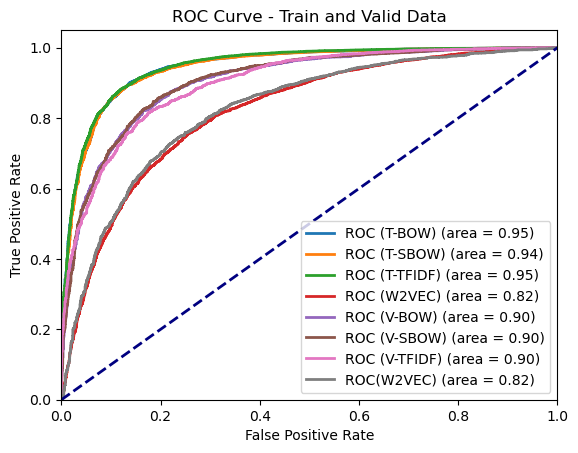

In [90]:
# Plot ROC curve
plt.figure()
#
plt.plot(fpr_bow_train,   tpr_bow_train,   lw=2, label='ROC (T-BOW) (area = %0.2f)'   % roc_auc_bow_train)
plt.plot(fpr_sbow_train,  tpr_sbow_train,  lw=2, label='ROC (T-SBOW) (area = %0.2f)'  % roc_auc_sbow_train)
plt.plot(fpr_tfidf_train, tpr_tfidf_train, lw=2, label='ROC (T-TFIDF) (area = %0.2f)' % roc_auc_tfidf_train)
plt.plot(fpr_w2vec_train, tpr_w2vec_train, lw=2, label='ROC (W2VEC) (area = %0.2f)'   % roc_auc_w2vec_train)
#
plt.plot(fpr_bow_valid,   tpr_bow_valid,   lw=2, label='ROC (V-BOW) (area = %0.2f)'   % roc_auc_bow_valid)
plt.plot(fpr_sbow_valid,  tpr_sbow_valid,  lw=2, label='ROC (V-SBOW) (area = %0.2f)'  % roc_auc_sbow_valid)
plt.plot(fpr_tfidf_valid, tpr_tfidf_valid, lw=2, label='ROC (V-TFIDF) (area = %0.2f)' % roc_auc_tfidf_valid)
plt.plot(fpr_w2vec_valid, tpr_w2vec_valid, lw=2, label='ROC(W2VEC) (area = %0.2f)'   % roc_auc_w2vec_valid)
#
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train and Valid Data')
plt.legend(loc="lower right")
plt.show()

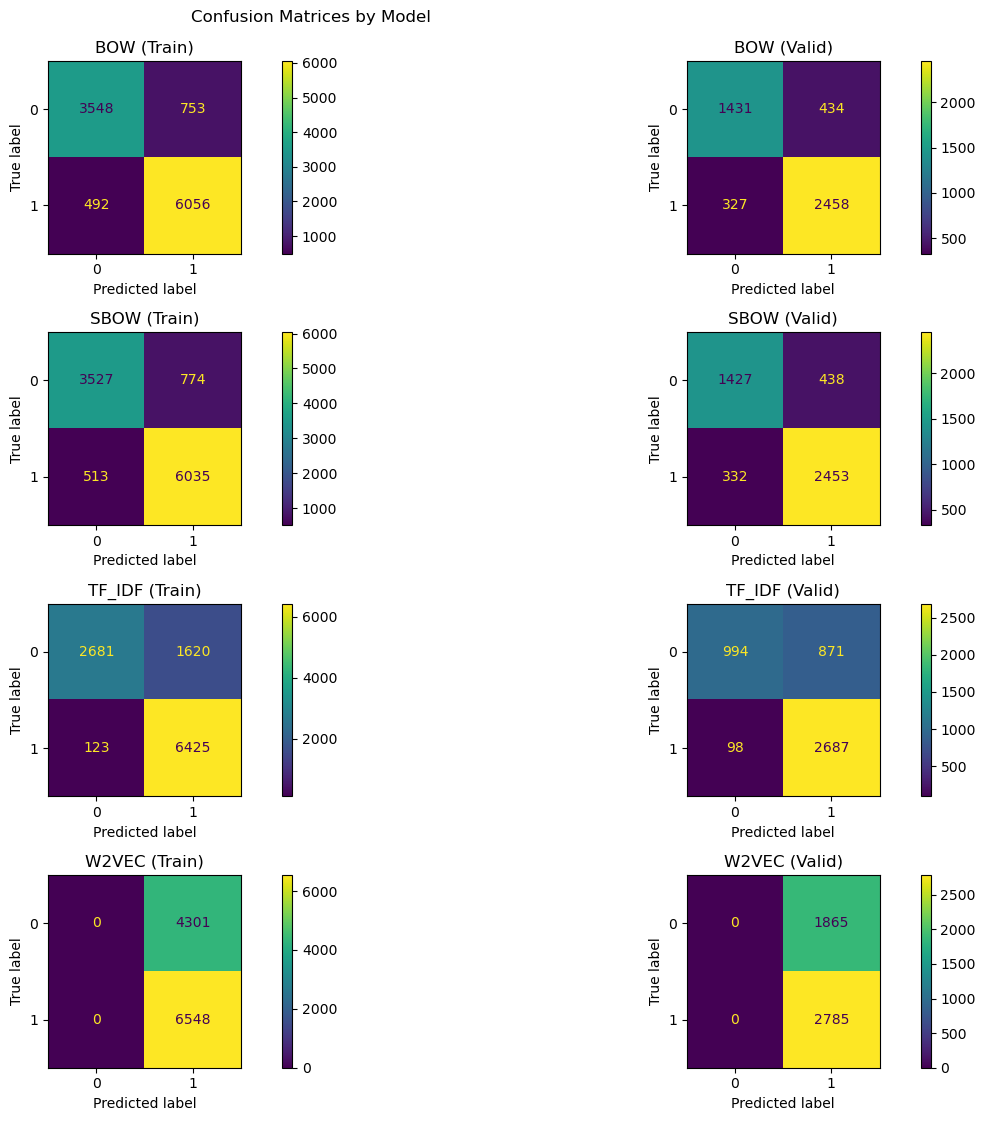

In [91]:
# Plot confusion matrix
fig,ax = plt.subplots(figsize=(15,12),nrows=4, ncols=2)

ax[0,0].set_title("BOW (Train)")
dispbow0 = ConfusionMatrixDisplay(confusion_matrix=cm_bow_train).plot(include_values=True, ax=ax[0,0])
ax[0,1].set_title("BOW (Valid)")
dispbow1 = ConfusionMatrixDisplay(confusion_matrix=cm_bow_valid).plot(include_values=True, ax=ax[0,1])
ax[1,0].set_title("SBOW (Train)")
dispbow2 = ConfusionMatrixDisplay(confusion_matrix=cm_sbow_train).plot(include_values=True, ax=ax[1,0])
ax[1,1].set_title("SBOW (Valid)")
dispbow3 = ConfusionMatrixDisplay(confusion_matrix=cm_sbow_valid).plot(include_values=True, ax=ax[1,1])
ax[2,0].set_title("TF_IDF (Train)")
dispbow4 = ConfusionMatrixDisplay(confusion_matrix=cm_tfidf_train).plot(include_values=True, ax=ax[2,0])
ax[2,1].set_title("TF_IDF (Valid)")
dispbow5 = ConfusionMatrixDisplay(confusion_matrix=cm_tfidf_valid).plot(include_values=True, ax=ax[2,1])
ax[3,0].set_title("W2VEC (Train)")
dispbow6 = ConfusionMatrixDisplay(confusion_matrix=cm_w2vec_train).plot(include_values=True, ax=ax[3,0])
ax[3,1].set_title("W2VEC (Valid)")
dispbow7 = ConfusionMatrixDisplay(confusion_matrix=cm_w2vec_valid).plot(include_values=True, ax=ax[3,1])

# dispbow0.plot(ax=ax0)
fig.suptitle("Confusion Matrices by Model\n\n\n\n", size=12, y=0.93)
plt.tight_layout()
plt.show()